In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from IPython import display

In [2]:
df = pd.read_csv("secret/luhft/2023-03-27/AI data.csv", skip_blank_lines=True, converters={"Study Number": int, "Age": int})

df = df.drop('Voice recording', axis=1)
df = df.rename(columns={'Smoker (y=1/ n=0)': 'Smoker'})
df['Smoker'] = df['Smoker'].str.title()
df

,Study Number,Gender,Age,Smoker,Diagnosis,Classification,Start ah,Observations
0,1,Female,74,Current,T4aN0M0- SCC,C,27.017,NaN
1,2,Male,63,Current,T1b- Cancer,C,44.466,NaN
2,3,Female,47,Non,LPR,N,20.953,NaN
3,4,Female,72,Non,Functional Laryngitis,N,21.480,NaN
4,5,Male,58,Current,T4N2b- Cancer,C,22.447,NaN
...,...,...,...,...,...,...,...,...
102,105,Female,58,Ex,Reinke's oedema,N,22.155,NaN
103,106,Male,60,Ex,Moderate dysplasia,C,23.623,NaN
104,107,Female,59,Current,Post pneumonia dysphonia,N,18.690,"More of an ""eh"" sound"
105,108,Female,89,Ex,presbylarynx,N,19.026,NaN


In [3]:
pd.crosstab(index=df['Gender'], columns=[df['Classification']], margins=True)


Classification,C,N,All
Gender,,,
Female,2,64,66
Male,7,34,41
All,9,98,107


In [4]:


pd.crosstab(index=df['Smoker'], columns=[df['Classification']], margins=True)


Classification,C,N,All
Smoker,,,
Current,5,19,24
Ex,4,33,37
Non,0,46,46
All,9,98,107


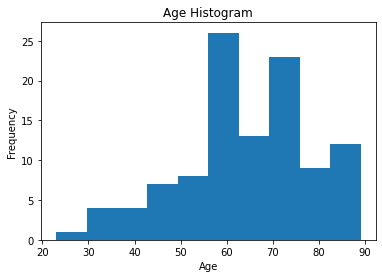

In [5]:
df['Age'].plot.hist(bins=10)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

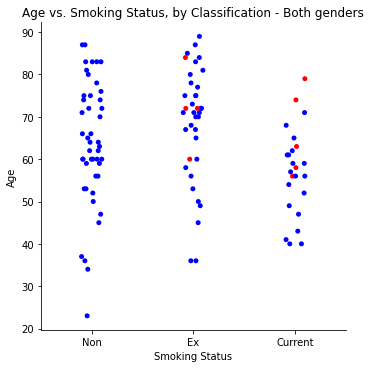

In [23]:

colours = {'C': 'red', 'N': 'blue'}
category_order = ['Non', 'Ex', 'Current']

sns.catplot(x='Smoker', y='Age', hue='Classification', legend=False, jitter=True, data=df, palette=colours, order=category_order, kind='strip')

plt.xlabel('Smoking Status')
plt.title('Age vs. Smoking Status, by Classification - Both genders')
plt.show()

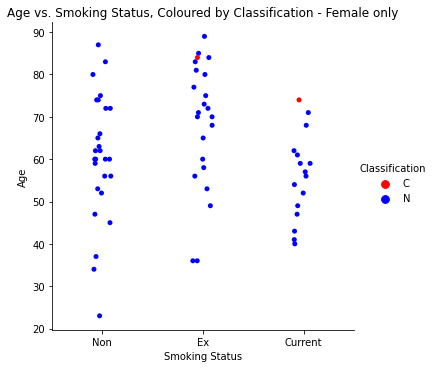

In [7]:
f_df = df.query("Gender == 'Female'")
sns.catplot(x='Smoker', y='Age', hue='Classification', data=f_df, palette=colours, order=category_order, kind='strip')
plt.xlabel('Smoking Status')
plt.title('Age vs. Smoking Status, Coloured by Classification - Female only')
plt.show()

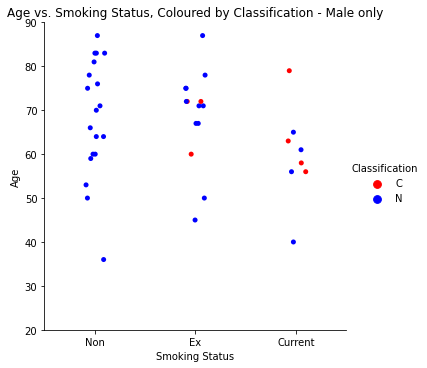

In [8]:
m_df = df.query("Gender == 'Male'")
g = sns.catplot(x='Smoker', y='Age', hue='Classification', data=m_df, palette=colours, order=category_order, kind='strip')
g.set(ylim=(20, 90))
plt.xlabel('Smoking Status')
plt.title('Age vs. Smoking Status, Coloured by Classification - Male only')
plt.show()

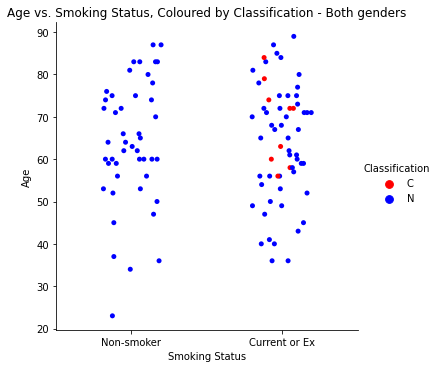

In [25]:
# Create a new column that maps "Smoking" and "Ex-smoker" to "Smoker/Ex-smoker"
df['Combined Smoking Status'] = df['Smoker'].map({'Current': 'Current or Ex', 'Non': 'Non-smoker', 'Ex': 'Current or Ex',})

colours = {'C': 'red', 'N': 'blue'}

category_order = ['Non-smoker', 'Current or Ex']
sns.catplot(x='Combined Smoking Status', y='Age', hue='Classification', data=df, palette=colours, order=category_order, kind='strip', jitter=0.2)
plt.xlabel('Smoking Status')
plt.title('Age vs. Smoking Status, Coloured by Classification - Both genders')

plt.show()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# A simple baseline rule for "older smokers" to see how well that fits
def eye_ball_rule(row):
    if row['Combined Smoking Status'] == 'Current or Ex' and row['Age'] > 55:
        return 'C'
    else:
        return 'N'


true_labels = np.array(df["Classification"])
always_predict_N = df.apply(eye_ball_rule, axis=1)

tn, fp, fn, tp = confusion_matrix(true_labels, always_predict_N, labels=['N', 'C']).ravel()

# Print the results
print('Confusion Matrix:')
print('TN: {}, FP: {}'.format(tn, fp))
print('FN: {}, TP: {}'.format(fn, tp))

# Calculate the specificity/selectivity
specificity = tn / (tn + fp)

# Calculate sensitivity/recall
sensitivity = tp / (tp + fn)

f1 = f1_score(true_labels, always_predict_N, pos_label='C')
print('Specificity/Selectivity: {:.2f}'.format(specificity))
print('Recall/Sensitivity: {:.2f}'.format(sensitivity))
print(f'F1 score: {f1:.4f}')


Confusion Matrix:
TN: 60, FP: 38
FN: 0, TP: 9
Specificity/Selectivity: 0.61
Recall/Sensitivity: 1.00
F1 score: 0.3214


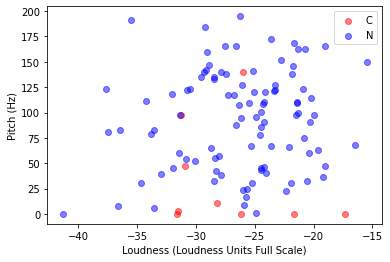

In [9]:
# Is there a simple segmentation based on just pitch and loudness?

df = pd.read_csv("secret/luhft/2023-03-27/AI_data+pitch+loud.csv")

c_data = df[df['Classification'] == 'C']
n_data = df[df['Classification'] == 'N']

plt.scatter(c_data['Loudness'], c_data['Pitch'], color='red', label='C', alpha=0.5)
plt.scatter(n_data['Loudness'], n_data['Pitch'], color='blue', label='N', alpha=0.5)

plt.ylabel('Pitch (Hz)')

# LUFS = relative measure of loudness taking into account the frequency response of human hearing. 
# The unit LUFS is based on the decibel scale, where 1 LUFS is equal to 1 dB relative to the reference level of full scale.
plt.xlabel('Loudness (Loudness Units Full Scale)')
plt.legend()

plt.show()

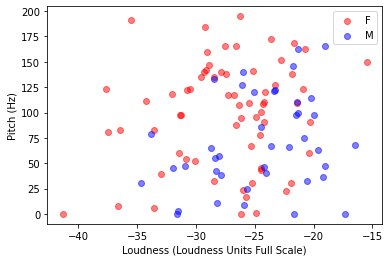

In [10]:
df = pd.read_csv("secret/luhft/2023-03-27/AI_data+pitch+loud.csv")

c_data = df[df['Gender'] == 'Female']
n_data = df[df['Gender'] == 'Male']

plt.scatter(c_data['Loudness'], c_data['Pitch'], color='red', label='F', alpha=0.5)
plt.scatter(n_data['Loudness'], n_data['Pitch'], color='blue', label='M', alpha=0.5)

plt.ylabel('Pitch (Hz)')
plt.xlabel('Loudness (Loudness Units Full Scale)')
plt.legend()

plt.show()

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import random

# As a baseline, how do we do if we always predict "N"?
true_labels = np.array(df["Classification"])
always_predict_N = ['N'] * len(df)

tn, fp, fn, tp = confusion_matrix(true_labels, always_predict_N, labels=['N', 'C']).ravel()

print('Confusion Matrix:')
print('TN: {}, FP: {}'.format(tn, fp))
print('FN: {}, TP: {}'.format(fn, tp))

accuracy = accuracy_score(true_labels, always_predict_N)

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

f1 = f1_score(true_labels, always_predict_N, pos_label='C')


print('Specificity/Selectivity: {:.2f}'.format(specificity))
print('Recall/Sensitivity: {:.2f}'.format(sensitivity))
print('Accuracy: {:.2f}'.format(accuracy))
print(f'F1 score: {f1:.4f}')



Confusion Matrix:
TN: 98, FP: 0
FN: 9, TP: 0
Specificity/Selectivity: 1.00
Recall/Sensitivity: 0.00
Accuracy: 0.92
F1 score: 0.0000
